In [ ]:
import numpy as np
import scipy
import xgboost
from xgboost import XGBRegressor
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
#from sympy import Symbol, nsolve, solve
#from sympy.solvers import solve

import time
import pickle
import keras# check scikit-learn version

# check scikit-learn version
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import normalize
from sklearn.ensemble import RandomForestRegressor

from skimage.metrics import structural_similarity as ssim

In [ ]:
from tensorflow import keras
#from tensorflow.python.keras.layers import Input, Dense, Convolution2D, MaxPooling2D, UpSampling2D,Cropping2D, AveragePooling2D,Dense,Flatten,Reshape,Dropout,TimeDistributed,LSTM,LeakyReLU,RepeatVector

from tensorflow.keras.layers import Input, Dense, Convolution2D, MaxPooling2D, UpSampling2D,Cropping2D,TimeDistributed, AveragePooling2D,Dense,Flatten,Reshape,Dropout,LSTM,LeakyReLU,RepeatVector,Conv2DTranspose
from tensorflow.keras.models import Model,Sequential


import numpy as np
import scipy
import math
import matplotlib.pyplot as plt
#import seaborn_image as isns
import numpy as np
#from matplotlib import cm
#from matplotlib import animation as animation
from PIL import Image

import tensorflow as tf
from tensorflow import keras
#import keras
import time

In [ ]:
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# inverse modelling

In [ ]:
input_data_train = latent_output[:5000,:]
input_data_test = latent_output[5000:,:]
train_input = input_data_train
test_input = input_data_test

true_train_output = parameter_input[:5000,:]
true_test_output = parameter_input[5000:,:]

In [ ]:
GB_model = XGBRegressor()

GB_model.fit(train_input, true_train_output)

test_output = GB_model.predict(test_input)

# CAE

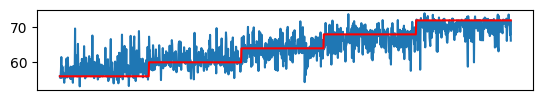

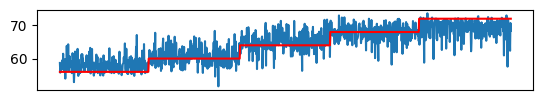

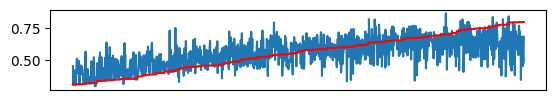

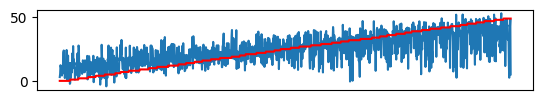

In [ ]:
from matplotlib.pyplot import figure
from sklearn.metrics import r2_score

#plt.figure(figsize=(14,6))
for index in range(4):
  plt.subplot(4, 1, index+1)
  s = list(true_test_output[:,index])

  deg1 = true_test_output[:,index][sorted(range(len(s)), key=lambda k: s[k])]

  deg2 = test_output[:,index][sorted(range(len(s)), key=lambda k: s[k])]

  #print('R2',r2_score(deg1,deg2))

  plt.plot(deg2,label = "model")
  plt.plot(deg1,'r',label = "true")
  #plt.legend()
  plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
  plt.show()

# Contrastive

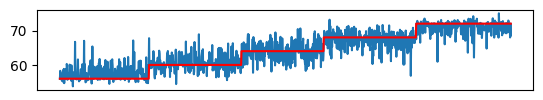

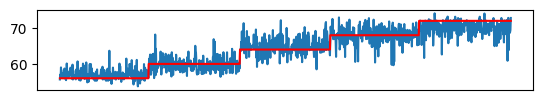

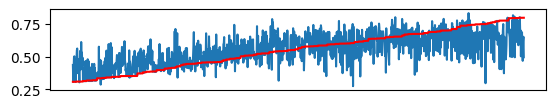

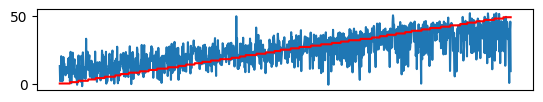

In [ ]:
from matplotlib.pyplot import figure
from sklearn.metrics import r2_score
#plt.figure(figsize=(14,6))
for index in range(4):
  plt.subplot(4, 1, index+1)
  s = list(true_test_output[:,index])

  deg1 = true_test_output[:,index][sorted(range(len(s)), key=lambda k: s[k])]

  deg2 = test_output[:,index][sorted(range(len(s)), key=lambda k: s[k])]

  #print('R2',r2_score(deg1,deg2))

  plt.plot(deg2,label = "model")
  plt.plot(deg1,'r',label = "true")
  plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
  #plt.legend()
  plt.show()

# latent space geometry

In [ ]:
method = 'CAE'

field_data = np.load('drive/MyDrive/CA_contrastive/data/all_fire_Chimney_field_25fire_tight_noisy.npy')

field_data = field_data.reshape(-1,128,128,1)

In [ ]:
method = 'CAE'

latent_output = np.load('drive/MyDrive/CA_contrastive/data/'+method+'128_latent_Chimney_30_25fire_tight_noisy.npy')
label_data = []

for i in range(25):
  label_data += [i]*(250)

label_data = np.array(label_data).astype(np.uint8)

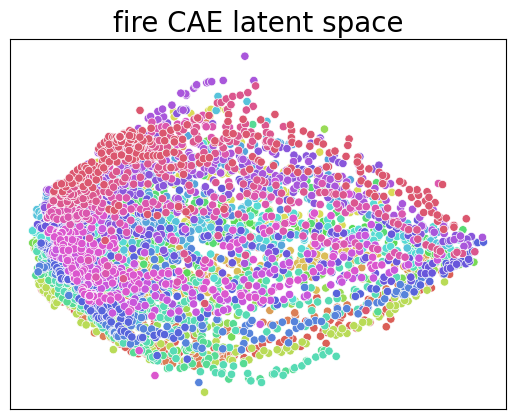

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

#iris = load_iris()
x = latent_output
y = label_data

tsne = PCA(n_components=2)  # Use PCA instead of t-SNE

z = tsne.fit_transform(x)

df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:, 0]
df["comp-2"] = z[:, 1]

g = sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                    palette=sns.color_palette("hls", 25),
                    data=df)
g.set_title("fire CAE latent space", fontsize=20)
g.get_legend().remove()

# Remove x and y ticks and labels
g.set_xticks([])
g.set_yticks([])
g.set_xticklabels([])
g.set_yticklabels([])

# Remove 'comp-1' and 'comp-2' labels
g.set_xlabel('')
g.set_ylabel('')

# Save the plot as a PNG image
plt.savefig("drive/MyDrive/contrastive/image/fire_CAE_latent.png")

# Show the plot (optional)
plt.show()


In [ ]:
method = 'contrastive'

latent_output = np.load('drive/MyDrive/CA_contrastive/data/'+method+'128_latent_Chimney_30_25fire_tight_noisy.npy')
label_data = []

for i in range(25):
  label_data += [i]*(250)

label_data = np.array(label_data).astype(np.uint8)

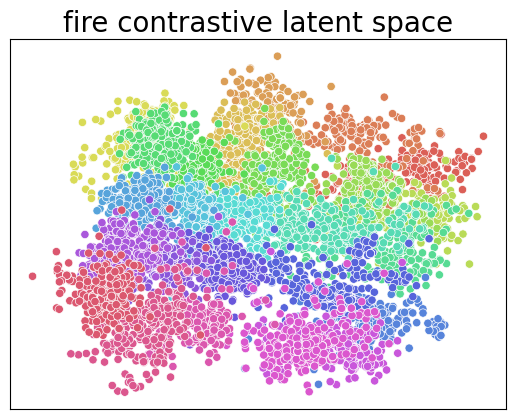

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

#iris = load_iris()
x = latent_output
y = label_data

tsne = PCA(n_components=2)  # Use PCA instead of t-SNE

z = tsne.fit_transform(x)

df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:, 0]
df["comp-2"] = z[:, 1]

g = sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                    palette=sns.color_palette("hls", 25),
                    data=df)
g.set_title("fire contrastive latent space", fontsize=20)
g.get_legend().remove()

# Remove x and y ticks and labels
g.set_xticks([])
g.set_yticks([])
g.set_xticklabels([])
g.set_yticklabels([])

# Remove 'comp-1' and 'comp-2' labels
g.set_xlabel('')
g.set_ylabel('')

# Save the plot as a PNG image
plt.savefig("drive/MyDrive/contrastive/image/fire_contrastive_latent.png")

# Show the plot (optional)
plt.show()
